In [16]:
import geopandas
from shapely import geometry
import matplotlib.pyplot as plt
from scipy.spatial import (
    Voronoi,
    voronoi_plot_2d,
    Delaunay,
    delaunay_plot_2d,
    cKDTree
)
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math, time
import interpolators

plt.rcParams['figure.figsize'] = 15, 10

external_crs = "EPSG:4326"
internal_crs = "EPSG:3068"
berlinDistricts = geopandas.read_file("../shared/berlinDistricts.geojson")
measurements = geopandas.read_file("test/data_2020-02-20T14-00-00.geojson")

berlinDistricts = berlinDistricts.to_crs(internal_crs)
measurements = measurements.to_crs(internal_crs)

x = np.array(measurements.geometry.x)
y = np.array(measurements.geometry.y)
values = np.array(measurements.value)
points = np.column_stack((x, y))

xmin, ymin, xmax, ymax = measurements.total_bounds
size = 500  # grid cell size in meters
xnew = np.linspace(xmin, xmax, int((xmax - xmin) / size))
ynew = np.linspace(ymin, ymax, int((ymax - ymin) / size))

points_train, points_test, values_train, values_test = train_test_split(points, values, test_size=0.2)

388.87405295743963


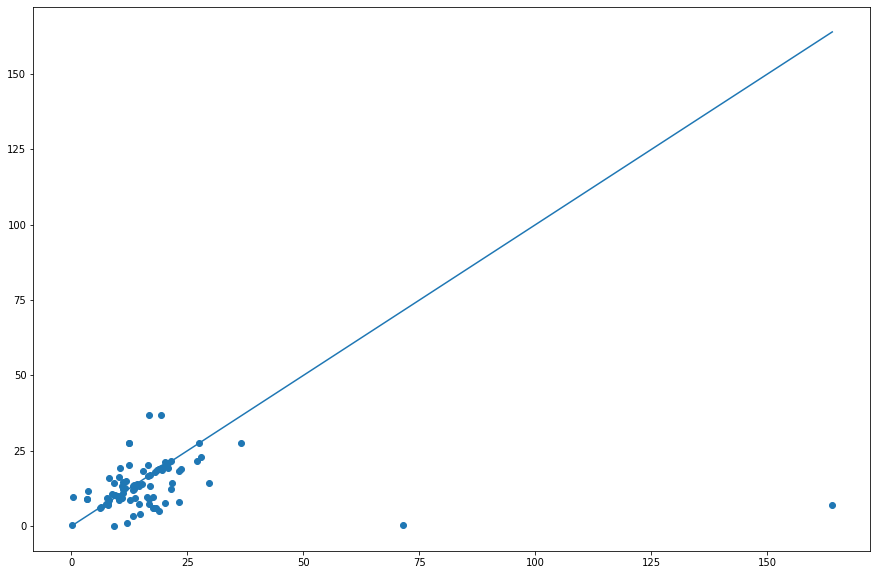

In [24]:
interpolated_values = interpolators.nearest_neighbor(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)
# interpolated_values = interpolators.inverse_distance_weighting(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)
# interpolated_values = interpolators.linear_barycentric(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)
# interpolated_values = interpolators.clough_tocher(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)
# interpolated_values = interpolators.natural_neighbor(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)

print(mean_squared_error(values_test, interpolated_values))
plt.scatter(values_test, interpolated_values)
plt.plot([0, np.max(values_test)], [0, np.max(values_test)])

388.87405295743963


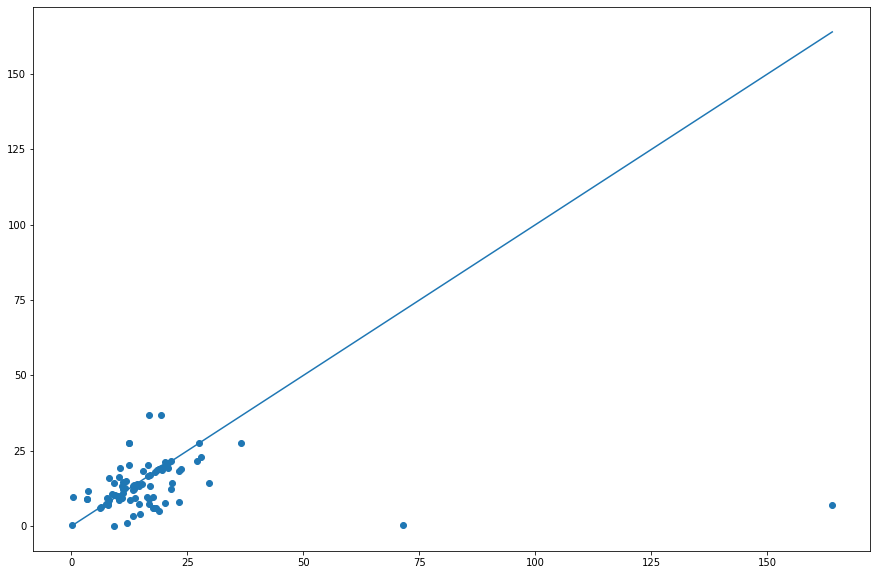

In [19]:
interpolated_values = interpolators.nearest_neighbor(points_test[:,0], points_test[:,1], points_train, values_train, grid=False)

print(mean_squared_error(values_test, interpolated_values))
plt.scatter(values_test, interpolated_values)
plt.plot([0, np.max(values_test)], [0, np.max(values_test)])